# Part 1. Exploratory Data Analysis (EDA)

탐색적 데이터 분석(Exploratory Data Analysis)는 데이터 사이언티스트가 데이터세트를 분석하고 조사하여 주요 특성을 파악하는 데에 사용되며, 데이터 시각화 방법을 사용하기도 합니다. 데이터 사이언티스트는 문제 해결을 위해 데이터 소스를 파악하고 조작하여 패턴, 비정상적인 수치, 가설의 테스트, 결과의 확인 등에 EDA를 사용합니다.

EDA(Exploratory Data Analysis)는 주로 **모델의 정규화**와 **가설 검증 작업**을 포함하여 데이터의 종류의 확인과 데이터 간의 관계에 대한 더 나은 이해를 제공하는 데에 사용됩니다. 또한 **데이터 분석을 위해 사용할 통계 기법이 적절한지 여부를 판단하는 데에 도움을 줍니다.** 미국의 수학자인 John Tukey가 1970년대에 개발한 EDA 기술은 현재에 이르러서 데이터 검색 프로세스에 널리 사용되고 있습니다.

* 도구 :
1. 데이터 세트의 각 필드에 대한 일변량 시각화
2. 데이터 세트의 각 변수와 관찰 변수 간의 관계를 평가하는 이변량 시각화 및 요약 통계
3. 데이터의 각각 필드 간의 상호 작용을 매핑하고 이해하기 위한 다변량 시각화
4. 통계 분석에서 결과 예측을 위해 자주 사용되는 선형 회귀 분석

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    #seaborn : statistical data visualization
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# data loading...

In [2]:
data=pd.read_csv('../input/titanic/train.csv')
data.head()

In [3]:
data.isnull().sum()   #checking total null values using isnull()
                      #Age, Cabin and Embarked have null values. I will try to fix them.

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived') #explode --> 파이조각이 돌출되는 크기 ex) [0,0.1] 은 2번째 파이 조각만 0.1만큼 돌출되게 함 
ax[0].set_ylabel('')        #autopct --> 파이 조각의 전체 대비 백분율을 소수점 1자리 까지 %로 표기하겠다. 
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

it is evident that not many passengers survived the accident.

# Type Of Features
* Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
(example) gender : male or female. so can by catergorised by them. 
* Ordinal Features:
similar to categorical values but the its difference is that values of the feature cab be ordered.
(example) height : can be ordered by tall, medium, short.
* Continuous Feature:
it can take values between any two point (minimum : maximum)

# Analysing The Feature 
# Sex $\rightarrow$ Categorical Feature

In [5]:
data.groupby(['Sex','Survived'])['Survived'].count()

dtype : A data type object (an instance of numpy. dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted.

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

* first figure :
Only 'Survived' Category was used by separaing the case with 'Sex'
* secpmd figure :
Two categories "Survived" or "Dead" were used by separating the case with 'Sex'
* characteristic : 
the number of survived female is greater than the number of survived male but
rather lesser than of dead male.

# Pclass $\rightarrow$ Ordinal Feature

In [7]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# margins : True로 주면 행과 열의 all 합계를 반환한다. gradient : 음영을 무엇으로 줄 것인가.

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],
                                      ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

* the grade of Passenger class give an effect to survival rate.
money and status matters.

& **Let's see the effect of Pclass and Sex togther for the survival rate**

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* the best survival rate occured in female-P1.
* the worst dead rate occured in male-P3.

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show() # hue : (optional) This parameter take column name for colour encoding.

* higher class grade has higher survival rate for both male and female case.
so this tell us **Pclass variable is one key for survival rate.**

# Age $\rightarrow$ Continuous Feature

In [11]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* left figure :
the mean Age of survived persons is increased by increasing grade of Pclass.
* right figure :
the Ages of Dead passengers at highest rate are almost same in both male and female case.
* there are many different persons with many different ages. as metioned, Age field has NaN values so the blank can be replaced by its mean age value(29). how we solve this problem? yes. '**Name**' field.

In [13]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    #lets extract the Salutations (Salutation : a standard formula of words 
    #used in a letter to address the person being written to.)

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials withe the Sex

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#inplace : modified data saved in original data base so many method can be used as same. ex) drop() method.
#https://story-opinion.tistory.com/25

In [16]:
data.groupby('Initial')['Age'].mean()

**we modified wired names in correct. now will fill the mean values of age for each name tags.**

In [17]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any()  # confirm that the null values are remaining

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_yticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* left figure : 
the maximum bar of dead occured near the range of age 30 or a little more.
this region has name as Mr.
* right figure :
the maximum bar of survived occured near the range of ages 0~5,20~25 and 30~35. this region has name as Master, Miss, Mrs.

$\rightarrow$ **Kids and Women First Policy**

In [20]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

* we can find the fact that the grade of Pclass is the key for survival rate for all name tags.

# Embarked $\rightarrow$ Categorical Value

In [21]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
#embarkation : 승선, 탑승.

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() # gcf() : get the current figure. last updated figure? don't know 
fig.set_size_inches(5,3)
plt.show()

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0]) # each passenger counted
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.3) #wspace,hspace : 그래프간의 간격 조절
plt.show()

* the majority of embarked is S in 3-Pclass. the maximum bar of dead also occured in S.
* the majority of Q embarkation (almost 95%) came from Pclass 3.

In [24]:
sns.factorplot("Pclass",'Survived',hue='Sex',col='Embarked',data=data)
plt.show()

* for S and Q Embarkations with female, it coincides with the importance of Pclass field but for C, the maximum survival rate occured in the middle Pclass (2).
* for male it has less pattern in the survival rate compared with female. (especially 'dead')

# Filling Embarked NaN
maximum passengers were contained in Port S, we replace the NaN Embarked with S.

In [25]:
data['Embarked'].fillna('S',inplace=True)

In [26]:
data.Embarked.isnull().any() #check NaN value

# SibSp $\rightarrow$ Discrete Feature
This field discriminates whether one is alone or has a family. Sibling : brother, sister, stepbrother, stepsister.
Spouse : husband, wife.

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

* the lesser SibSp one has the more one survived but the same as dead case.

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
ax[1]=sns.pointplot('SibSp','Survived',data=data)
ax[1].set_title('SibSp vs Survived')
plt.show()

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

* The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died. 
* imminent : 목전의, 임박한

# Parch

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

* This also show that large family (Parch>=4) wwre in Pclass 3.

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
ax[1]=sns.pointplot('Parch','Survived',data=data)
plt.show()

* conjecture : the passengers with too many parents has possibility to act altogather by lowering  the chance surviving.

# Fare $\rightarrow$ Continuous Feature

In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Free ride exist!!

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* The Pclass 2 is the broadest in fare distribution. In all Pclasses, the real maximum value of density was dismissed. interpolation don't go correctly ometimes.

# Correlation Between The Features

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* the diagonal values are all 1 because any field coincides with itself.
* the minus values represent inverse proportionality between row and column field.
* the plus values represent proportionality between row and column field.
* all values ranges between -1 and 1. (property of correlation)
* **The highest correlation is relation between SibSp and Parch** (=0.41 light green color)

# Part2: Feature Engineering and Data Cleaning

1. There maybe be many redundant features which should be eliminated.
2. Observation and extraction process gives new features.
3. example) Name feature : Name refinement and inserting of mean value for NaN.

# Age_band

Age is continous feature so it is necessary to convert it into discrete values by binning or Normalisation. here we use binning. i.e group a range of ages into a single bin or assign them a single value.

In [35]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# to_frame() : 'name' as input and data frame as output.

In [37]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show() # col : the feature of confirming graph separation

* Same patterns for all Pclass values. minus correlation between Age(band) and Survived.

# Family_Size and Alone
1. Family_size = No. of SibSp + No. of Parch
2. Family_size = 0 means that the passenger is alone (=1) 
3. alone = 0 means that family_size is not 0.
3. So two features have different views.

In [77]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

In [96]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.close(4)
plt.show()

* In the second figure, we see the one who has family has more chances to survive than Alone.

In [39]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

* Of six lines, Only one has a different view from others. It is female (red line) of third graph.
we see that women in alone has more chances to survive than women who have family. 

# Fare_Range
fare is also continous feature, it must be converted into ordinal value.
we use **pandas.qcut.**
this arranges the values according the number of bins.

In [40]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

* Again, we see that high fare range give more chance to survive.

Now, Being concluded **Fare_Range** was important frame, we would convert it into singleton values same as we did in **Age_Band**

In [41]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [42]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

* As Fare_cat increases, then the Survived increases for both female and male cases.

# Converting String Values into Numeric
it it necessary to convert sting into number because of well-usability with other numeric values.

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Dropping UnNeeded Features** \
Name : cannot be catergorized. &nbsp; Age : we already have Age_band. \
Ticket : cannot be catergorized because of its randomness. \
Fare : we have Fare_cat feature already. &nbsp; Cabin(선실) : integrity violation(each person maybe have NaN,&nbsp; 2,3,...etc) 
Fare_Range : we have Fare_cat already. \
PassengerId : cannot be catergorized because of its uniqueness.

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(16,13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Examples of positive correlation : Family_Size and Parch or Family_Size and SibSp...
* Examples of negative correlation : Family_Size and Alone or Parch and Alone...

# Part3: Predictive Modeling
* for predictive modeling, what we must do : \
 -Logistic Regression \
 -Support Vector Machines(Linear and radial) \
 -Random Forest  \
 -K-Nearest Neighbours  \
 -Naive Bayes  \
 -Decision Tree  \
 -Logistic Regression : This method uses the function $Sig(x)=\frac{1}{1+e^{-x}}$

In [45]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

* sklearn : sci-kit learn. the machine learning libraries for python.

In [46]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

from sklearn.model_selection import train_test_split\
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

(1) Parameter
arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)\
test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)\
train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)\
random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)\
shuffle : 셔플여부설정 (default = True)\
stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

(2) Return
X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.\
X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

**Example**

import numpy as np\
from sklearn.model_selection import train_test_split\

X = [[0,1],[2,3],[4,5],[6,7],[8,9]]\
Y = [0,1,2,3,4]

* 데이터(X)만 넣었을 경우\
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)\
X_train : [[0,1],[6,7],[8,9],[2,3]]\
X_test : [[4,5]]

* 데이터(X)와 레이블(Y)을 넣었을 경우\
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=321)\
X_train : [[4,5],[0,1],[6,7]]\
Y_train : [2,0,3]\
X_test : [[2,3],[8,9]]\
Y_test : [1,4]


### Radial Support Vector Machines(rbf-SVM)

In [47]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

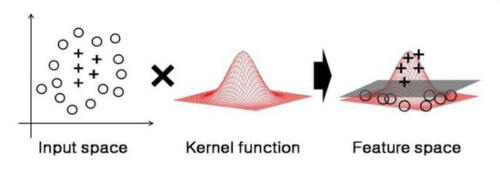

### Linear Support Vector Machine(linear-SVM)

In [48]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

* support vector : decision boundary와 가장 가까운 training set의 data point.
* margin : support vector와 decision boundary와의 distance.
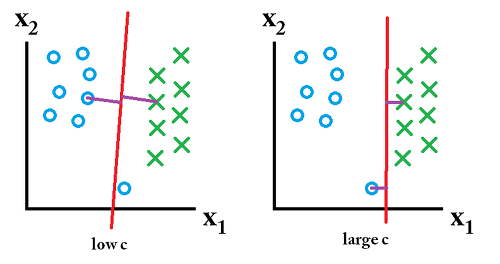

### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

### Decision Tree

In [50]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

### K-Nearest Neighbours(KNN)

In [51]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

**K is taken as a odd number** becuase if not, the equal possibility can occur for two class A and B.

In [52]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)  
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',
     a.values.max())

### Gaussian Naive Bayes

In [53]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

### Random Forests

In [54]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

## Cross Validation
1. At first, Divide the dataset into k-subsets.
2. Let k=5. Reserve 1 part for testing and train the algorithm over the 4 parts.
3. In each iteration, we changes the testing part and trains the algorithm over the other parts. then the errors and accuracies are averaged.
4. finally, we get a average accuracy of the algorithm. \
$\rightarrow$ This is called **K-Fold Cross Validation.**

In [55]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, 
# split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

In [56]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

In [57]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

* For Accuracy, It would be different from model to model

### Confusion Matrix

In [58]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
Y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


* the values of 0 and 1 in horizontal or vertical represent dead or survived. 
* the region of colors light yellow and red predicted correctly.
* the black regions predicted incorrectly dead $\rightarrow$ survived
or survived $\rightarrow$ dead.

## Hyper-Parameters Tuning 
Hyperparameter : These are tunnable parameter for better result.

### SVM

In [59]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

### Random Forests

In [60]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

## Ensembling
It is a combination of various simple models to creat a single powerful model. It also improves the stability of the model.\
1)Voting Classifier\
2)Bagging\
3)Boosting

### Voting Classifier
It gives average prediction result based on the prediction of all the submodels.

In [61]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[
    ('KNN',KNeighborsClassifier(n_neighbors=10)),
    ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
    ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
    ('LR',LogisticRegression(C=0.05)),
    ('DT',DecisionTreeClassifier(random_state=0)),
    ('NB',GaussianNB()),
    ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

## Bagging
It works by applying similar classifiers on small partitions of the database and then taking the average of all the predictions.
### Bagged KNN

In [62]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy') 
print('The cross validated score for bagged KNN is:',result.mean())

### Bagged DecisionTree

In [63]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

## Boosting
for the first training on the complete dataset, when the next iteration starts, the learner will focus on the wrong instances or give more weights
to it. these are repeated until the limit is reached on the accuracy.
### Adaptive Boosting

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

### Stochastic Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

### XGBoost

In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

### Hyper-Parameter Tuning for Adaptive Boost

In [68]:
n_estimators=list(range(100, 1100, 100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

### Confusion Matrix for the Best Model

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature importance

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

* As the refined feature, Initial feature has the best importance.
* As the unrefined feature, Pclass has  the best importance as expected.